In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
import seaborn as sns
%matplotlib notebook

In [4]:
#load in the data

fname = 'At Risk Students For Dartmouth.xlsx'
sheet1 = 'Year 16-17'
sheet2 = 'Year 17-18 9.25.17'
columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')
y1_data = pd.read_excel(fname, sheetname=sheet1, skiprows=[0], names=columns)
y2_data = pd.read_excel(fname, sheetname=sheet2, skiprows=[0], names=columns)

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

In [5]:
#do some data cleaning

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
#y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: '', '504': 504, 'IEP': IEP  })
#y1_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: '', '504': 504, 'IEP': IEP  })

#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

In [6]:
y1_data.head()

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
id,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,1,NaN,22,0,0,0,0,0,0,0,1,2,2,0
300339,12,18,Hartford High School/HACTC,F,N,0,NaN,4,2,4,13,9,6,27,15,5,36,15,7
300340,11,17,Hartford High School/HACTC,M,N,0,NaN,1,0,0,5,1,1,3,0,5,24,0,1
300344,9,15,Hartford High School/HACTC,M,N,0,NaN,0,0,0,15,0,0,0,1,0,3,0,0
300345,8,15,Hartford Memorial Middle School,M,N,0,504,0,0,0,3,0,1,4,0,1,5,0,3


In [7]:
pd.unique(y1_data['specialneeds'])

array([nan, 504, 'IEP'], dtype=object)

In [38]:
#create a new column total_debauchery which has the total number of unexcused absences for all marking periods
y1_data['total_debauchery'] = y1_data['unexcused1'] + y1_data['unexcused2']+ y1_data['unexcused3']+ y1_data['unexcused4']
y1_data['total_excused'] = y1_data['excused1'] + y1_data['excused2']+ y1_data['excused3']+ y1_data['excused4']
y1_data

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,...,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4,total_debauchery,total_excused
id,,,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,NaN,NaN,22,0,0,...,0,0,0,0,1,2,2,0,2,24
300339,12,18,Hartford High School/HACTC,F,N,NaN,NaN,4,2,4,...,9,6,27,15,5,36,15,7,41,80
300340,11,17,Hartford High School/HACTC,M,N,NaN,NaN,1,0,0,...,1,1,3,0,5,24,0,1,1,33
300344,9,15,Hartford High School/HACTC,M,N,NaN,NaN,0,0,0,...,0,0,0,1,0,3,0,0,1,18
300345,8,15,Hartford Memorial Middle School,M,N,NaN,504,0,0,0,...,0,1,4,0,1,5,0,3,0,12
300628,11,17,Hartford High School/HACTC,F,N,NaN,NaN,2,1,1,...,0,3,6,0,5,2,4,11,5,10
300630,9,15,Hartford High School/HACTC,M,N,NaN,504,1,0,1,...,0,0,0,1,0,2,1,2,2,3
300631,8,14,Hartford Memorial Middle School,F,N,NaN,NaN,0,0,1,...,0,0,2,1,0,0,2,0,3,3
300908,11,18,Hartford High School/HACTC,F,N,NaN,NaN,1,0,0,...,0,1,3,0,3,0,9,6,9,8


In [39]:
#create two different data frames based on economic status (advantaged vs. disadvantaged)
df_adv = y1_data.drop(y1_data[(y1_data.disadvantaged == 1)].index)
df_disadv = y1_data.drop(y1_data[(y1_data.disadvantaged == 0)].index)

In [40]:
df_disadv

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,...,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4,total_debauchery,total_excused
id,,,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,NaN,NaN,22,0,0,...,0,0,0,0,1,2,2,0,2,24
300339,12,18,Hartford High School/HACTC,F,N,NaN,NaN,4,2,4,...,9,6,27,15,5,36,15,7,41,80
300340,11,17,Hartford High School/HACTC,M,N,NaN,NaN,1,0,0,...,1,1,3,0,5,24,0,1,1,33
300344,9,15,Hartford High School/HACTC,M,N,NaN,NaN,0,0,0,...,0,0,0,1,0,3,0,0,1,18
300345,8,15,Hartford Memorial Middle School,M,N,NaN,504,0,0,0,...,0,1,4,0,1,5,0,3,0,12
300628,11,17,Hartford High School/HACTC,F,N,NaN,NaN,2,1,1,...,0,3,6,0,5,2,4,11,5,10
300630,9,15,Hartford High School/HACTC,M,N,NaN,504,1,0,1,...,0,0,0,1,0,2,1,2,2,3
300631,8,14,Hartford Memorial Middle School,F,N,NaN,NaN,0,0,1,...,0,0,2,1,0,0,2,0,3,3
300908,11,18,Hartford High School/HACTC,F,N,NaN,NaN,1,0,0,...,0,1,3,0,3,0,9,6,9,8


<IPython.core.display.Javascript object>


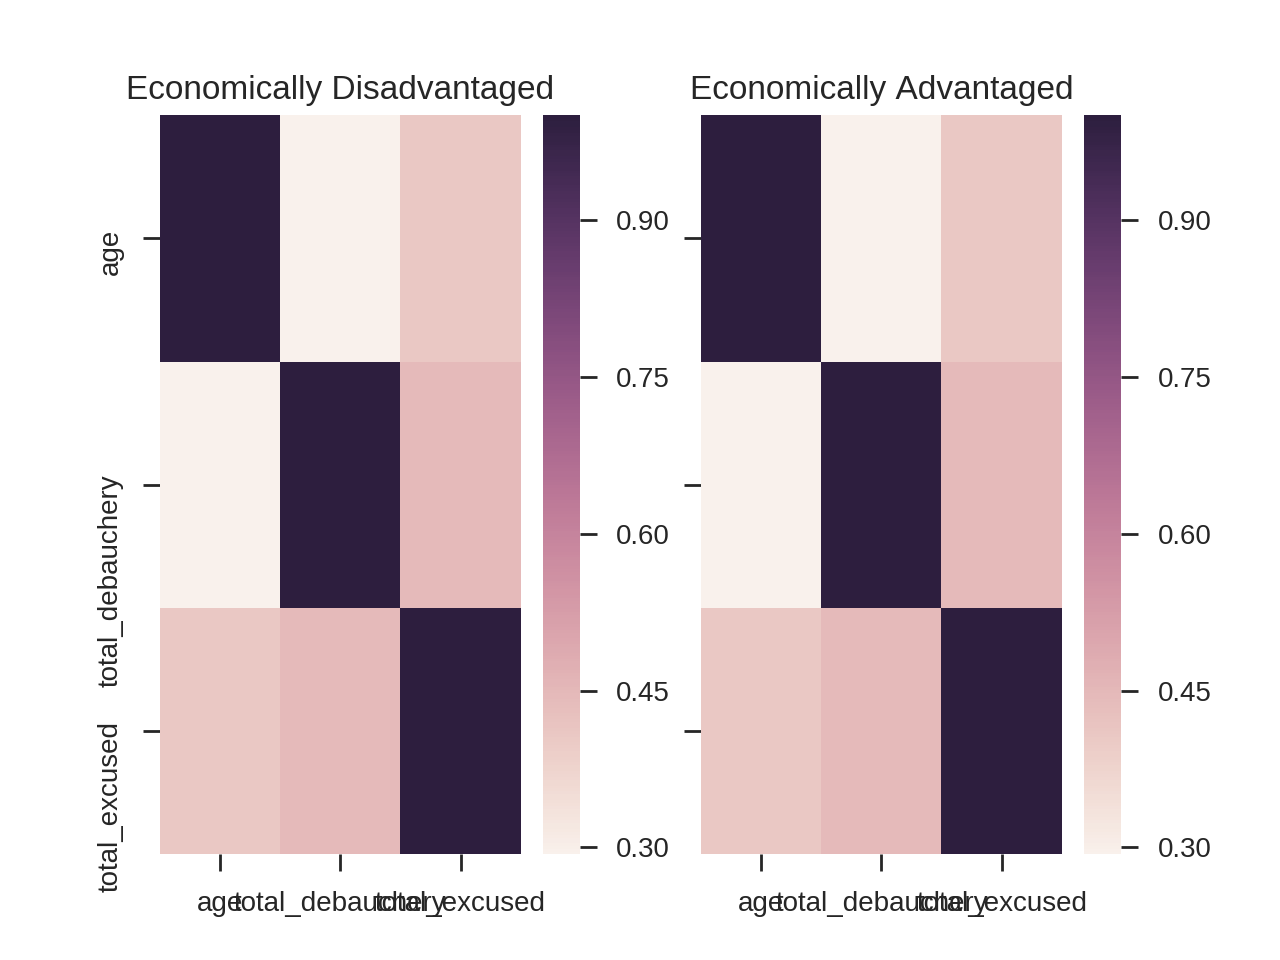

In [47]:
#get two plots side by side, one for economically advantaged and one for economically disadvantaged
#this is only for first marking period
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.set_title('Economically Disadvantaged')
ax2.set_title('Economically Advantaged')

variables = ['age', 'total_debauchery', 'total_excused']

# Calculate correlations
corr1 = df_disadv[variables].corr()
corr2 = df_adv[variables].corr()

# Heatmap
sns.heatmap(corr1, ax = ax1)
sns.heatmap(corr2, ax = ax2)

<IPython.core.display.Javascript object>


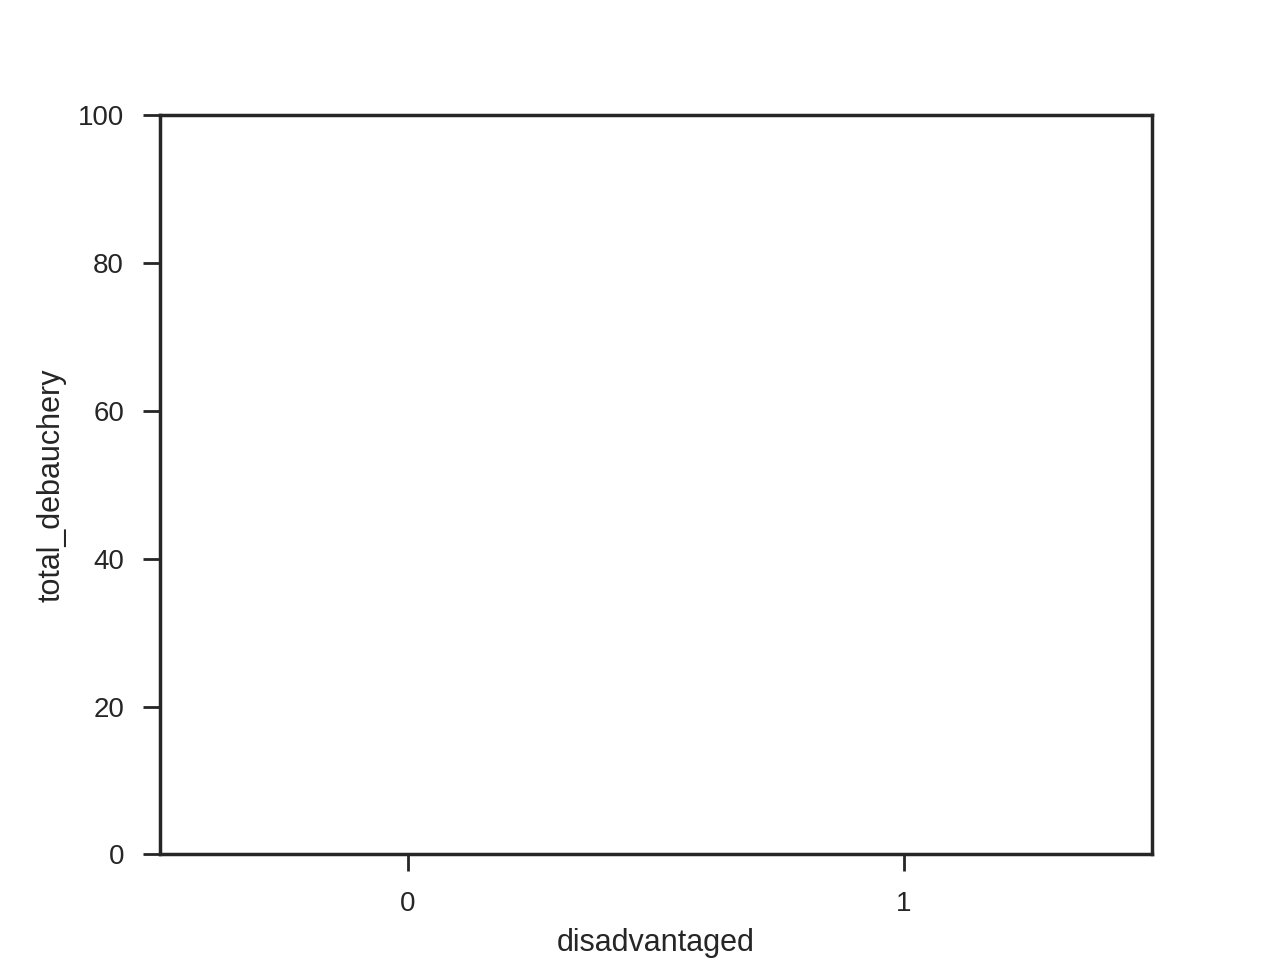

(0, 100)

In [43]:
sns.boxplot(data = y1_data, x='disadvantaged', y = 'total_debauchery', order=[0, 1])
plt.ylim(0,100)

In [24]:
data = y1_data
data['disadvantaged'] = data['disadvantaged'].map({0: 'A', 1: 'D'})
data

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4,total_debauchery
id,,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,NaN,NaN,22,0,0,0,0,0,0,0,1,2,2,0,2
300339,12,18,Hartford High School/HACTC,F,N,NaN,NaN,4,2,4,13,9,6,27,15,5,36,15,7,41
300340,11,17,Hartford High School/HACTC,M,N,NaN,NaN,1,0,0,5,1,1,3,0,5,24,0,1,1
300344,9,15,Hartford High School/HACTC,M,N,NaN,NaN,0,0,0,15,0,0,0,1,0,3,0,0,1
300345,8,15,Hartford Memorial Middle School,M,N,NaN,504,0,0,0,3,0,1,4,0,1,5,0,3,0
300628,11,17,Hartford High School/HACTC,F,N,NaN,NaN,2,1,1,0,0,3,6,0,5,2,4,11,5
300630,9,15,Hartford High School/HACTC,M,N,NaN,504,1,0,1,0,0,0,0,1,0,2,1,2,2
300631,8,14,Hartford Memorial Middle School,F,N,NaN,NaN,0,0,1,1,0,0,2,1,0,0,2,0,3
300908,11,18,Hartford High School/HACTC,F,N,NaN,NaN,1,0,0,4,0,1,3,0,3,0,9,6,9


<IPython.core.display.Javascript object>


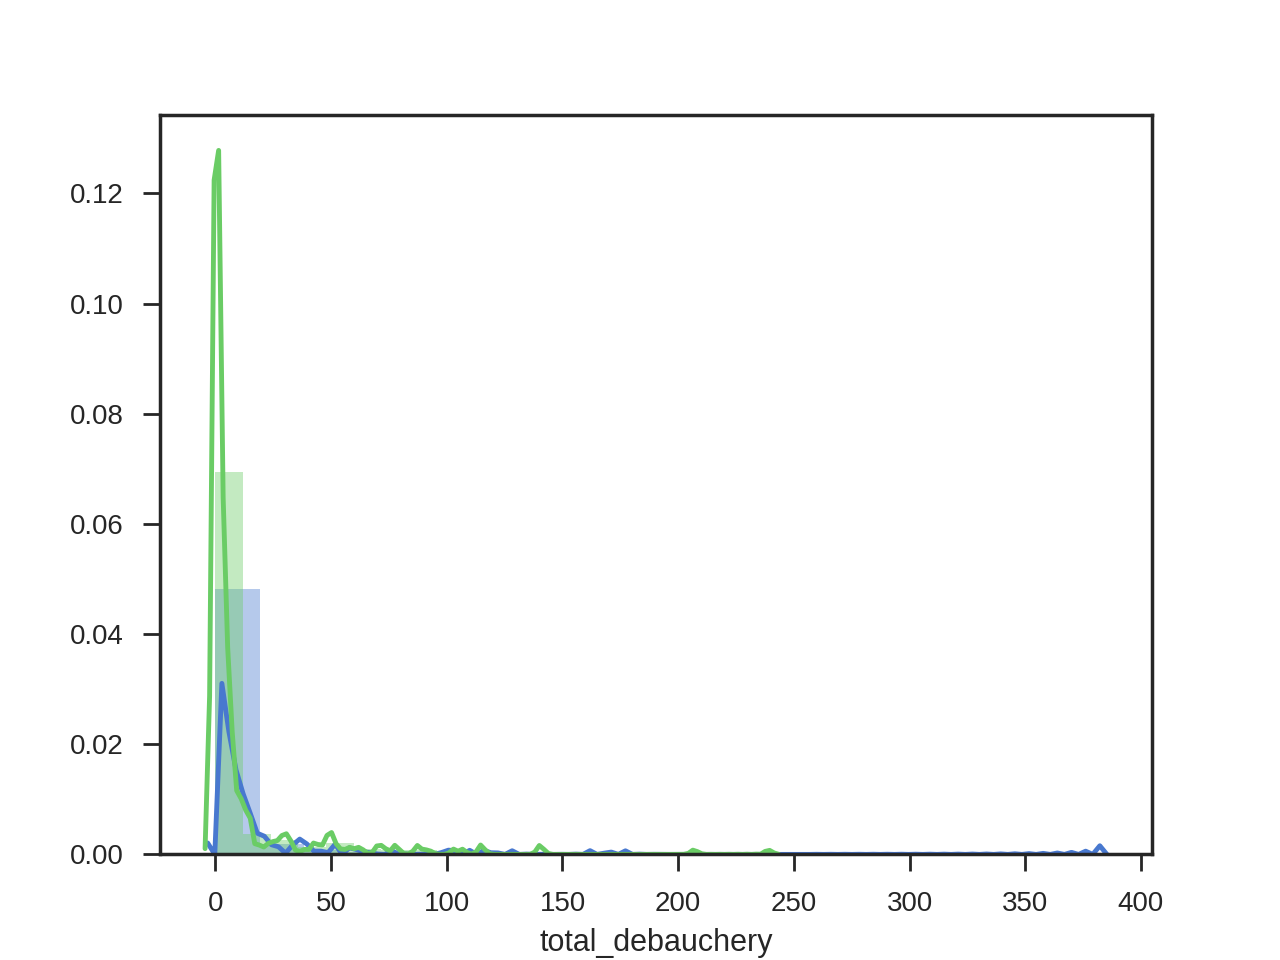

In [34]:
#distribution plot of total absences

sns.distplot(df_adv['total_debauchery'], bins = 20)
sns.distplot(df_disadv['total_debauchery'], bins = 20) 
#plt.xlim(0,100)

#disadv is in green, adv is in blue

<IPython.core.display.Javascript object>


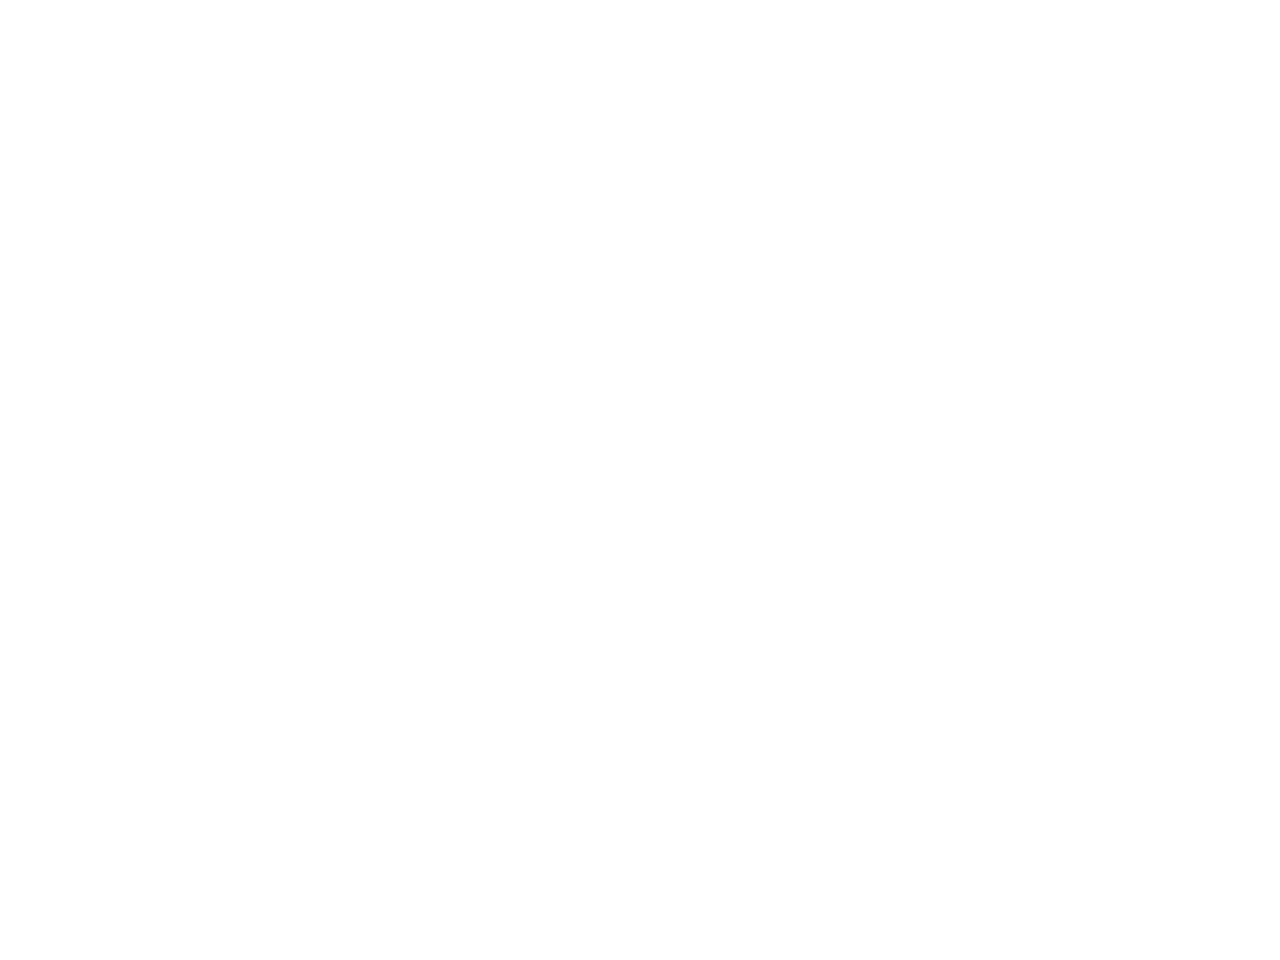

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:192: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

In [33]:
for d in ['A', 'D']:
    sns.distplot(data[data.disadvantaged == d]['total_debauchery'], bins = 20, label = d)
sns.plt.legend()

In [16]:
sns.set_palette('muted')
sns.set_style('ticks')
plt.xlim(0,100)

(0, 100)